## Dependencies

In [22]:
import numpy as np
import pandas as pd
import wfdb
from IPython.display import display
import matplotlib.pyplot as plt
# from tensorflow import keras
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.fft import fft
from scipy.signal import butter, filtfilt
path = "/Users/jdanninger/Documents/GitHub/HPC/term-preterm-ehg-database-1.0.1/"

## Initial Look at the Data

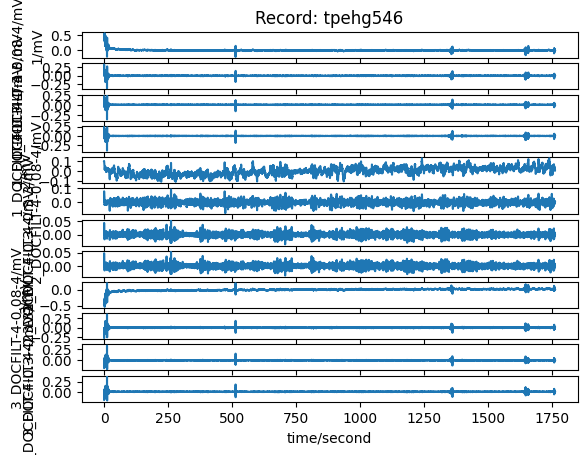

['1', '1_DOCFILT-4-0.08-4', '1_DOCFILT-4-0.3-3', '1_DOCFILT-4-0.3-4', '2', '2_DOCFILT-4-0.08-4', '2_DOCFILT-4-0.3-3', '2_DOCFILT-4-0.3-4', '3', '3_DOCFILT-4-0.08-4', '3_DOCFILT-4-0.3-3', '3_DOCFILT-4-0.3-4']


In [23]:
record = wfdb.rdrecord(path + 'tpehgdb/tpehg546') 
wfdb.plot_wfdb(record=record) 
# display(record.__dict__['sig_name'])
# display(record.__dict__['p_signal'].size)
print(record.__dict__['sig_name'])

## Understanding from data:
The data has tons of different different signals (this one has 12)
Here are the main 4 signals:




## Turn Record into dataframe and CSV

In [24]:
def to_df(filename):
    record = wfdb.rdrecord(filename)
    labels = record.__dict__['sig_name']
    p_signal = record.__dict__['p_signal']
    df = pd.DataFrame(p_signal, columns=labels)
    return df

def to_csv(record, output_name):
    labels = record.__dict__['sig_name']
    p_signal = record.__dict__['p_signal']
    df = pd.DataFrame(p_signal, columns=labels)
    df.to_csv(output_name)

def read_records(file_path):
    with open(file_path, 'r') as file:
        records = file.read().splitlines()
    return records

file_path = '/Users/jdanninger/Documents/GitHub/HPC/term-preterm-ehg-database-1.0.1/RECORDS.txt'
records = read_records(file_path)
print(records)



['tpehgdb/tpehg1007', 'tpehgdb/tpehg1021', 'tpehgdb/tpehg1022', 'tpehgdb/tpehg1027', 'tpehgdb/tpehg1029', 'tpehgdb/tpehg1031', 'tpehgdb/tpehg1039', 'tpehgdb/tpehg1065', 'tpehgdb/tpehg1070', 'tpehgdb/tpehg1088', 'tpehgdb/tpehg1089', 'tpehgdb/tpehg1093', 'tpehgdb/tpehg1097', 'tpehgdb/tpehg1113', 'tpehgdb/tpehg1116', 'tpehgdb/tpehg1118', 'tpehgdb/tpehg1119', 'tpehgdb/tpehg1120', 'tpehgdb/tpehg1121', 'tpehgdb/tpehg1128', 'tpehgdb/tpehg1130', 'tpehgdb/tpehg1132', 'tpehgdb/tpehg1134', 'tpehgdb/tpehg1136', 'tpehgdb/tpehg1137', 'tpehgdb/tpehg1138', 'tpehgdb/tpehg1139', 'tpehgdb/tpehg1142', 'tpehgdb/tpehg1147', 'tpehgdb/tpehg1149', 'tpehgdb/tpehg1150', 'tpehgdb/tpehg1151', 'tpehgdb/tpehg1152', 'tpehgdb/tpehg1161', 'tpehgdb/tpehg1163', 'tpehgdb/tpehg1167', 'tpehgdb/tpehg1169', 'tpehgdb/tpehg1177', 'tpehgdb/tpehg1183', 'tpehgdb/tpehg1188', 'tpehgdb/tpehg1192', 'tpehgdb/tpehg1197', 'tpehgdb/tpehg1201', 'tpehgdb/tpehg1202', 'tpehgdb/tpehg1203', 'tpehgdb/tpehg1205', 'tpehgdb/tpehg1212', 'tpehgdb/tpe

## Get Data Records

In [25]:
def get_records(list_of_records, prefix):
    return_me = []
    for record in list_of_records:
        return_me.append(wfdb.rdrecord(prefix+record) )
    return return_me

records = get_records(records, path)


## Turn into CSV

In [27]:
count = 0
for record in records:
    to_csv(record, "term_"+str(count)+".csv")
    count += 1

## Preterm into CSV

In [29]:
count = 0
for record in records:
    to_csv(record, "/Users/jdanninger/Documents/GitHub/HPC/CSV2"+str(count)+".csv")
    count += 1

## Control into CSV

In [30]:
count = 0
for record in control_records:
    to_csv(record, "control"+str(count)+".csv")
    count += 1

## Double Check the data matches

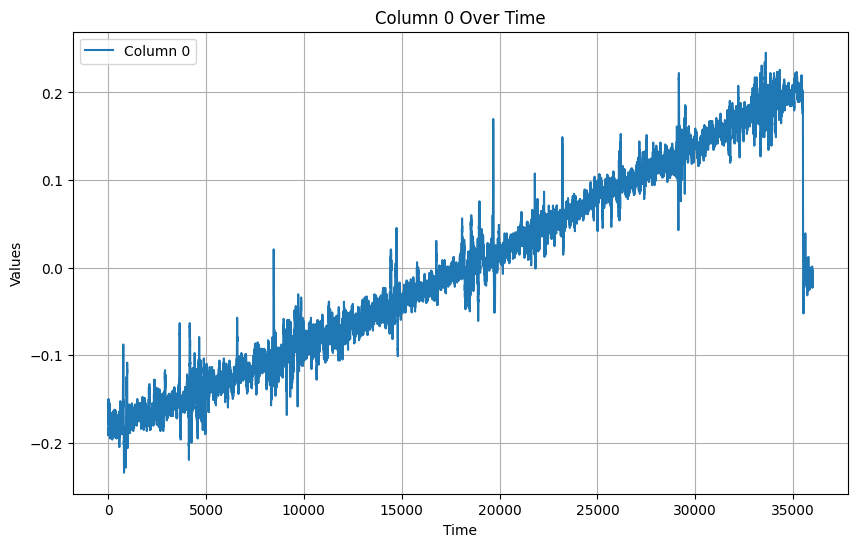

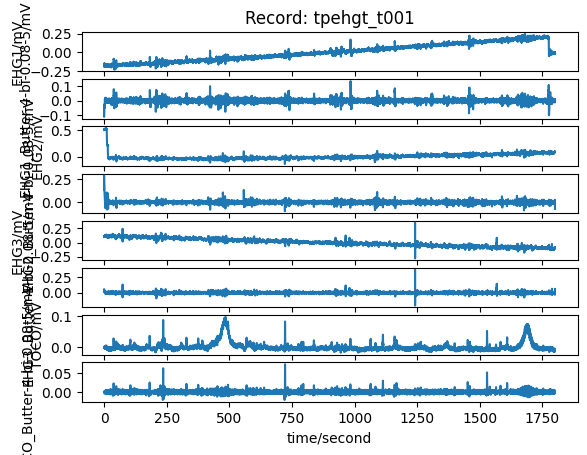

In [19]:
df = to_df('term-preterm-ehg-dataset-with-tocogram-1.0.0/tpehgt_t001')



plt.figure(figsize=(10,6))
plt.plot(df.index, df.iloc[:, 0], label='Column 0')  # df.iloc[:, 0] refers to column 0
plt.title('Column 0 Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

wfdb.plot_wfdb(record=record) 